In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')
#Display propertice
pd.set_option('max_columns', 104)
pd.set_option('max_rows',104)

In [2]:
#importing data
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
df.shape

(18278, 104)

# Extracting Certain Columns

In [4]:
df.describe().columns #numeric variables

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [5]:
df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [6]:
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [7]:
#df = df[df.overall > 75] # extracting players with overall above 86
##df

In [8]:
pd.set_option('display.max_rows',70)  #https://pandas.pydata.org/docs/user_guide/options.html
df.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
international_reputation          0
weak_foot                         0
skill_moves                       0
release_clause_eur             1298
team_jersey_number              240
contract_valid_until            240
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
attacking_crossing          

# Replace null values with mean

In [9]:
df = df.fillna(df.mean())

In [10]:
df.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [11]:
names = df.short_name.tolist() # saving names for later https://www.geeksforgeeks.org/python-pandas-series-tolist/

df = df.drop(['short_name'], axis = 1) # drop the short_name column

In [12]:
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,12.114565,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


# Normalize (rescale) the data

In [13]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.615385,0.285714,0.366667,1.000000,0.978261,0.905213,1.000000,1.00,0.75,0.75,1.000000,0.091837,0.285714,0.383261,0.875000,0.987179,1.000000,1.000000,0.320000,0.619048,0.465704,0.422927,0.462630,0.455116,0.486767,0.447495,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.554502,0.716814,1.00,0.75,1.00,0.492816,0.061224,0.428571,0.206897,0.916667,1.000000,0.852941,0.904110,0.266667,0.809524,0.465704,0.422927,0.462630,0.455116,0.486767,0.447495,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.423077,0.387755,0.300000,0.956522,0.934783,1.000000,0.513274,1.00,1.00,1.00,0.996935,0.091837,0.428571,0.310345,0.930556,0.897436,0.926471,0.986301,0.226667,0.492063,0.465704,0.422927,0.462630,0.455116,0.486767,0.447495,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.734597,0.221239,0.50,0.50,0.00,0.841154,0.122449,0.571429,0.000000,0.606957,0.478183,0.488732,0.541529,0.487380,0.601217,0.934783,1.000000,0.741379,0.936170,0.754717,0.980000,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.853081,0.831858,0.75,0.75,0.75,0.942284,0.061224,0.714286,0.310345,0.930556,0.871795,0.911765,0.972603,0.266667,0.619048,0.465704,0.422927,0.462630,0.455116,0.486767,0.447495,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923


In [14]:
#import matplotlib.pyplot as plt
#import scipy.cluster.hierarchy as sch


#plot dendrogram using single linkage
#plt.figure(figsize = (10,14))
#plt.title('Hierarchical clustering Dendrogram with Single Linkage')

#dendrogram = sch.dendrogram(sch.linkage(X_norm, method = 'single'), labels = names, leaf_font_size = 13,orientation = 'top')


# Use PCA to reduce 60 columns into 2

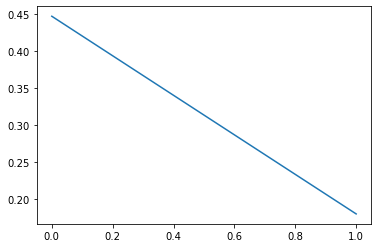

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

plt.plot(pca.explained_variance_ratio_)

In [16]:
#df.head()

In [17]:
# Creation of required x

In [18]:
X=df.iloc[:,0:55]    #iloc[start_row : end_row , start_col : end_col]
X

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,32,170,72,94,94,95500000,565000,5,4,4,1.958000e+08,10.0,2021.0,12.114565,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26
1,34,187,83,93,93,58500000,405000,5,4,5,9.650000e+07,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24
2,27,175,68,92,92,105500000,290000,5,5,5,1.952000e+08,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29
3,26,188,87,91,93,77500000,125000,3,3,1,1.647000e+08,13.0,2023.0,1.000000,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18
4,28,175,74,91,91,90000000,470000,4,4,4,1.845000e+08,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,40000,2000,1,3,2,7.000000e+04,36.0,2019.0,12.114565,57.000000,23.000000,28.000000,33.000000,47.000000,51.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52
18274,22,177,66,48,56,40000,2000,1,2,2,7.200000e+04,31.0,2022.0,12.114565,58.000000,24.000000,33.000000,35.000000,48.000000,48.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57
18275,19,186,75,48,56,40000,1000,1,2,2,7.000000e+04,38.0,2019.0,12.114565,54.000000,35.000000,44.000000,45.000000,48.000000,51.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46
18276,18,185,74,48,54,40000,1000,1,2,2,7.000000e+04,33.0,2022.0,12.114565,59.000000,35.000000,47.000000,47.000000,45.000000,52.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54


In [19]:
elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

SyntaxError: invalid syntax (<ipython-input-19-9de4d65d8b25>, line 1)

In [ ]:
#Fitting KMeans to the dataset
kmeans = KMeans(n_clusters = 4, random_state = 42)     #deduced from the elbow method graph
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

# Perform K-Means clustering

In [ ]:
#from sklearn.cluster import KMeans

# specify the number of clusters
#kmeans = KMeans(n_clusters=3)   #deduced from the elbow method graph

# fit the input data
#kmeans = kmeans.fit(reduced)

# get the cluster labels
#labels = kmeans.predict(reduced)

# centroid values
#centroid = kmeans.cluster_centers_

# cluster values
#clusters = kmeans.labels_.tolist()

# Make a new data frame by adding players' names and their cluster

In [ ]:
#reduced['cluster'] = clusters
#reduced['name'] = names
#reduced.columns = ['x', 'y', 'cluster', 'name']
#reduced.head(18278)

In [ ]:
#count0=0
#count1=0
#count2=0

#for i in clusters:
    #if i==0:
        #count0=count0+1
    #elif i==1:
        #print(1)
        #count1=count1+1
    #elif i==2:
        #count2=count2+1
    #else:
       # continue
#print("cluster0",count0)
#print("cluster1",count1)
#print("cluster2",count2)



In [ ]:
#get the counts

#'''sns.countplot(x= df['cluster'])

#print(df['cluster'].value_counts())'''


# VisualiZation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#sns.set(style="white")

#ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False, fit_reg=False, size = 15, scatter_kws={"s": 250})

#texts = []
#for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    #texts.append(plt.text(x, y, s))

#ax.set(ylim=(-2, 2))
#plt.tick_params(labelsize=15)
#plt.xlabel("PC 1", fontsize = 20)
#plt.ylabel("PC 2", fontsize = 20)

#plt.show()

Hierarchical Clustering

In [ ]:
#df.head()

In [ ]:
#from sklearn import preprocessing

#x = df.values # numpy array
#scaler = preprocessing.MinMaxScaler()
#x_scaled = scaler.fit_transform(x)
#X_norm = pd.DataFrame(x_scaled)

Hierarchical Clustering with Single Linkage

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


#plot dendrogram using single linkage
plt.figure(figsize = (10,14))
plt.title('Hierarchical clustering Dendrogram with Single Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method = 'single'), labels = names, leaf_font_size = 13,orientation = 'top')


Hierarchical Clustering with complete Linkage

In [ ]:
#plot dendrogram using complete linkage
plt.figure(figsize = (10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method = 'complete'), labels = names, leaf_font_size = 13, orientation = 'top')


In [ ]:
#plt dendrogram using average linkage
plt.figure(figsize = (10,14))
plt.title('Hierarchical clustering Dendrogram with Average Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method = 'average'),labels = names,leaf_font_size = 13, orientation='top')


In [ ]:
#plot dendrogram using centroid linkage
plt.figure(figsize = (10,14))
plt.title('Hierchical Clustering Dendrogram with Centroid Linkage')
dendrogram = sch.dendrogram(sch.linkage(X_norm, method = 'centroid'), labels = names,leaf_font_size = 13,orientation = 'top')


In [ ]:
Based on this dendrogram we can conclude that the complete linkage seems most accurate.